## Author: Arnab Datta


## Task1: Mark Percentage Prediction

Prediction of mark percentage of a student based on number of study hours mentioned. 

#### Loading dataset

In [1]:
#Importing necessary headers

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#reading dataset using url 

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data= pd.read_csv(url)

#checking the structure of loaded data

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Exploratory Data Analysis

In [3]:
#checking dimentionality of data

data.shape 

(25, 2)

In [4]:
#data descriptions

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'percentage of marks')

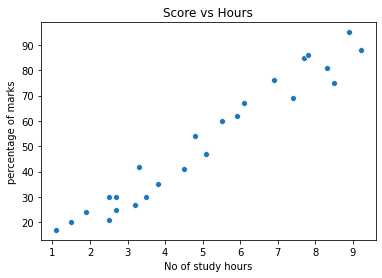

In [5]:
##graphical representation of scores vs hours

plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours', y='Scores', data=data,)
plt.title('Score vs Hours')
plt.xlabel('No of study hours')
plt.ylabel('percentage of marks')

#### Splitting data for test and train.

In [6]:
#importing library for splitting data 

from sklearn.model_selection import train_test_split  

In [7]:
#dividing data into features and labels. 

x= data.drop('Scores', axis=1)
y= data['Scores']

In [8]:
#spitting 0.3% of data for test and rest for training through '101' level of randomness

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#### Train the model using Linear Regression and predict

In [9]:
#import

from sklearn.linear_model import LinearRegression

In [10]:
LR_model= LinearRegression()

In [11]:
#fitting for training 

LR_model.fit(X_train, y_train)

LinearRegression()

In [12]:
#making the predictions

predictions= LR_model.predict(X_test)

In [13]:
#manual comparison between real and predicted values

compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
compare

,Actual,Predicted
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


In [14]:
#predict on whole dataset for visual comparison done later
predict_whole= LR_model.predict(x)

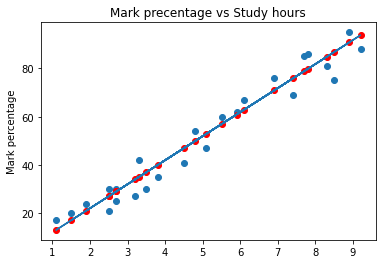

In [15]:
#visually differentating real values and predicted values along with regression line

regression_line= LR_model.coef_* x + LR_model.intercept_
plt.scatter(x, y)
plt.plot(x, regression_line);
plt.scatter(x, predict_whole, c='red')
plt.title('Mark precentage vs Study hours')
plt.ylabel('Mark percentage')
plt.xlabel('')
plt.show()

#### Model evaluation

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# RMSE value check
mean_squared_error(y,predict_whole)

29.435604116246278

In [18]:
#Calculating the model accuracy. 
accuracy_error=np.mean(np.abs(y-predict_whole)/np.abs(y))
accuracy= 100-(accuracy_error*100)
print('Model accuracy: ',accuracy)

Model accuracy:  88.06018944769761
